In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [11]:
data = pd.read_csv("titanic.csv")

In [12]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [14]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
missing_percent = data.isnull().sum() / len(data) * 100

In [16]:
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})

In [17]:
missing_percent

,column,percent missing
0,PassengerId,0.000000
1,HomePlanet,2.312205
2,CryoSleep,2.496261
3,Cabin,2.289198
4,Destination,2.093639
5,Age,2.059128
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


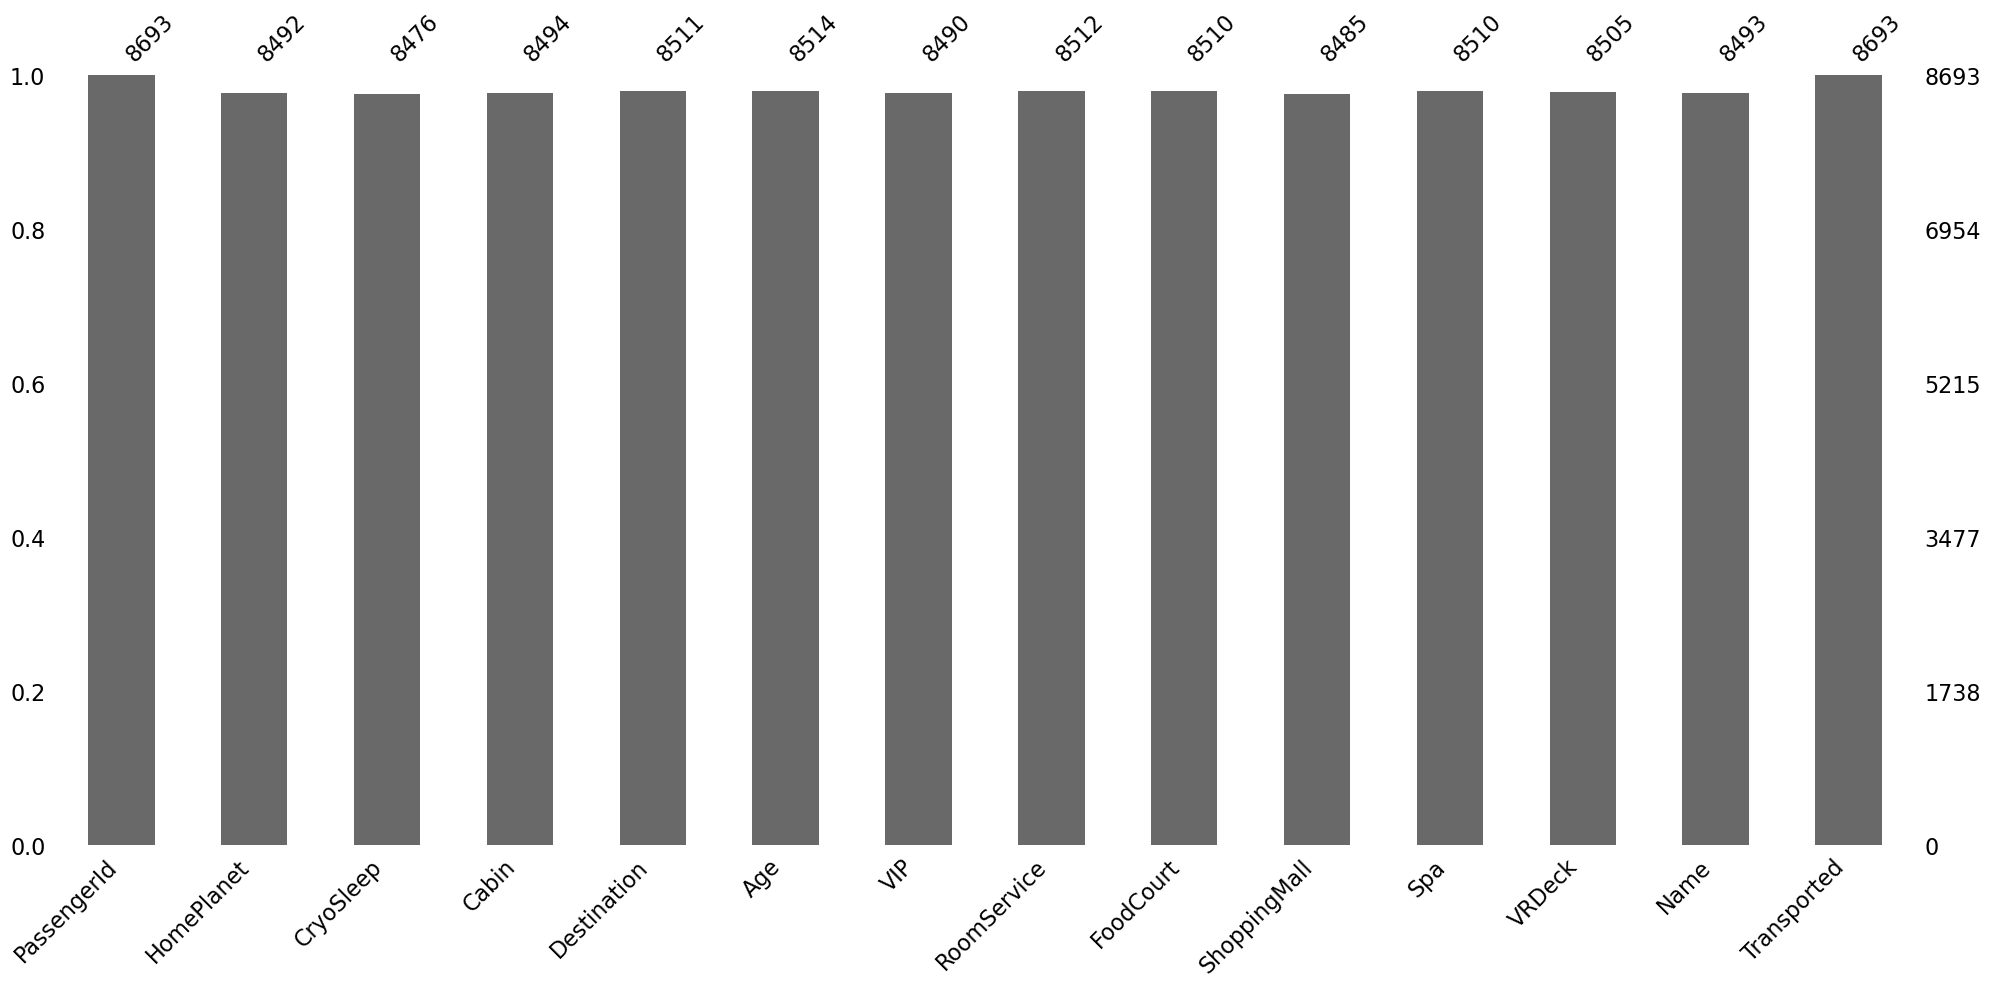

In [20]:
msno.bar(data)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

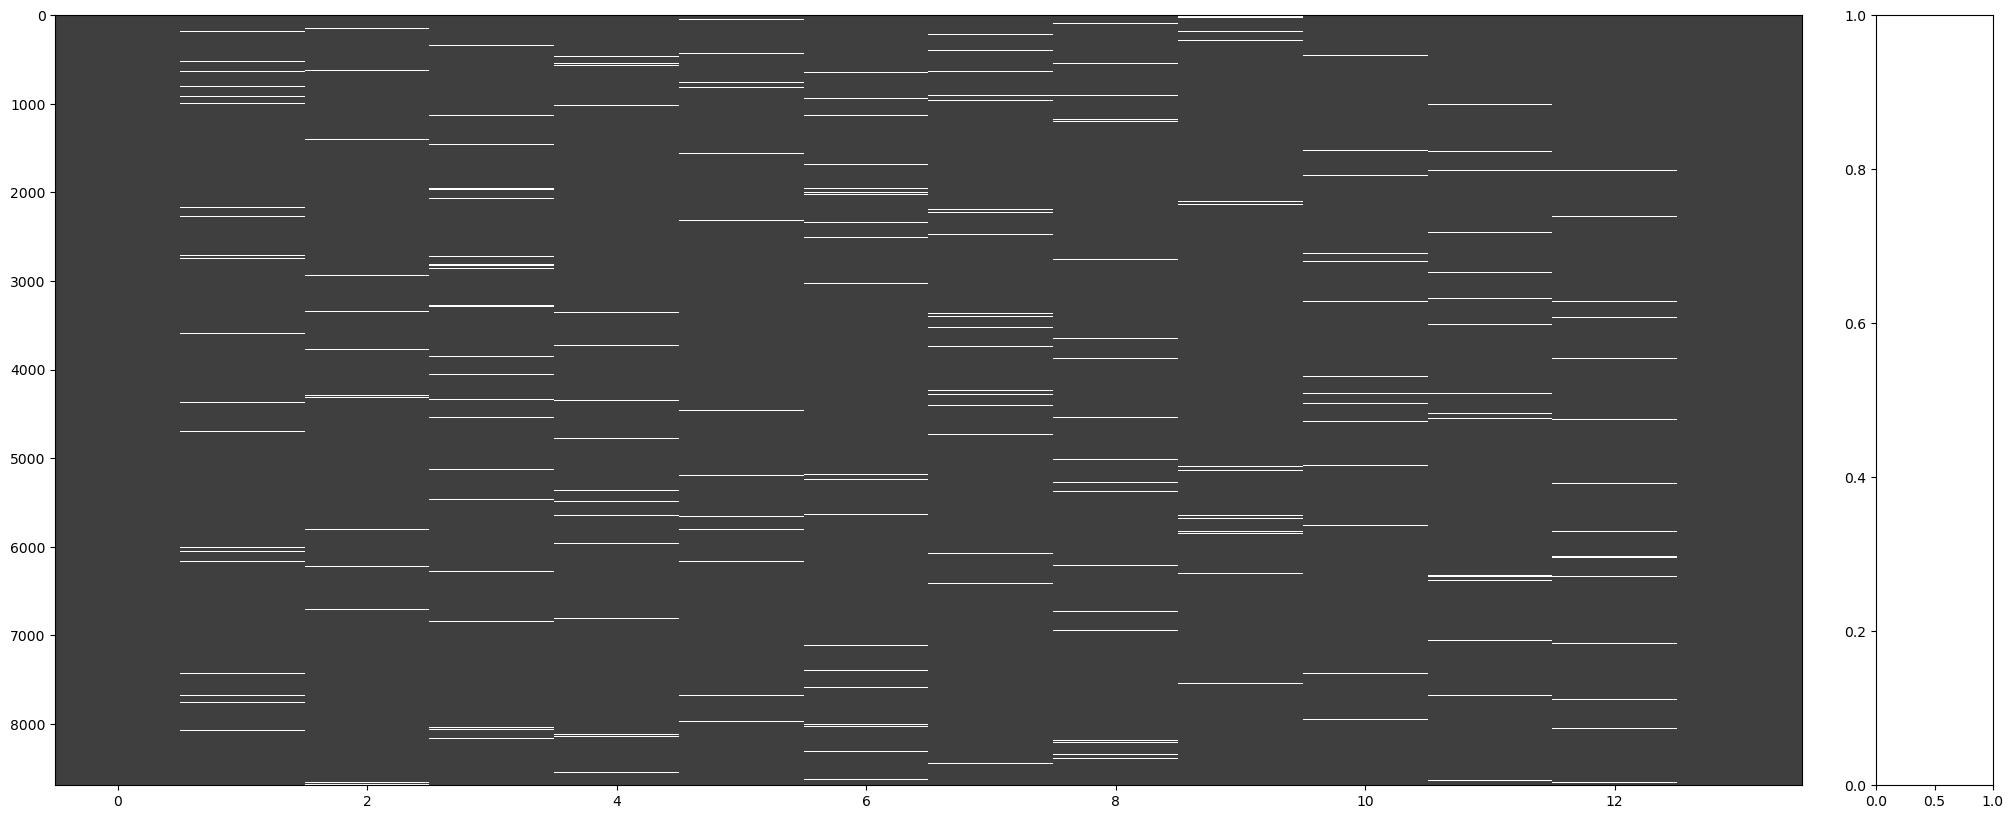

In [21]:
msno.matrix(data)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

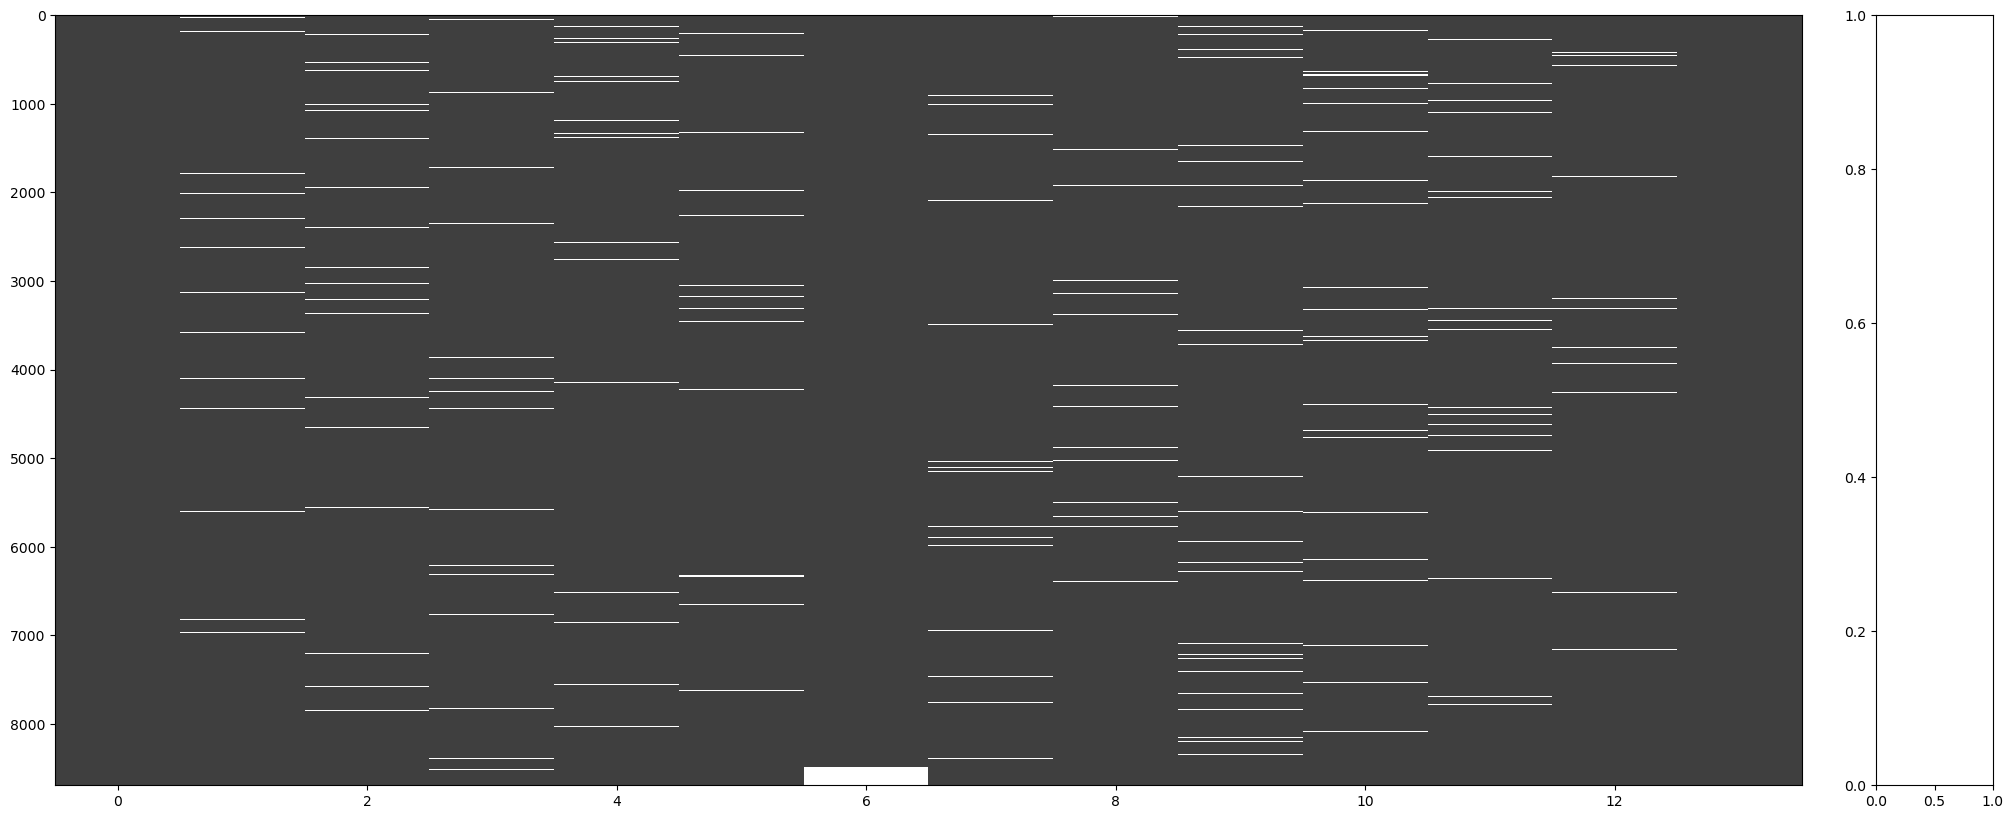

In [22]:
msno.matrix(data.sort_values('VIP'))
plt.show()

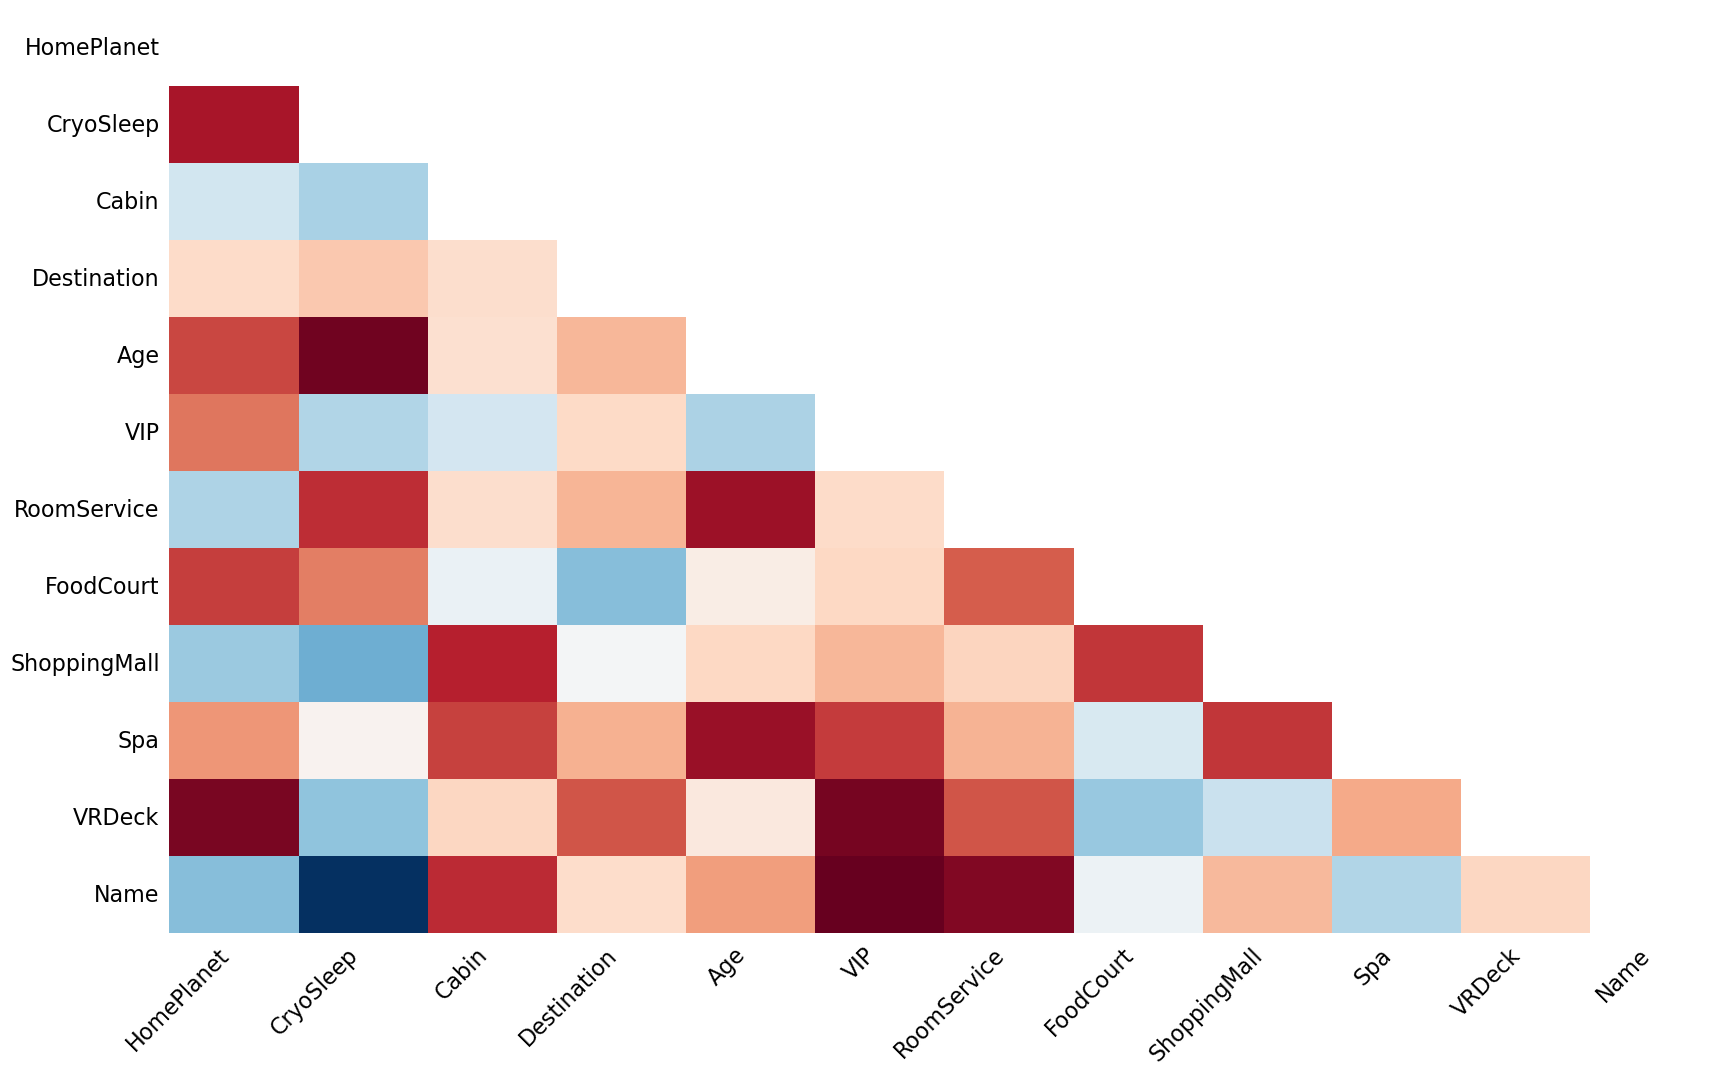

In [23]:
msno.heatmap(data)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

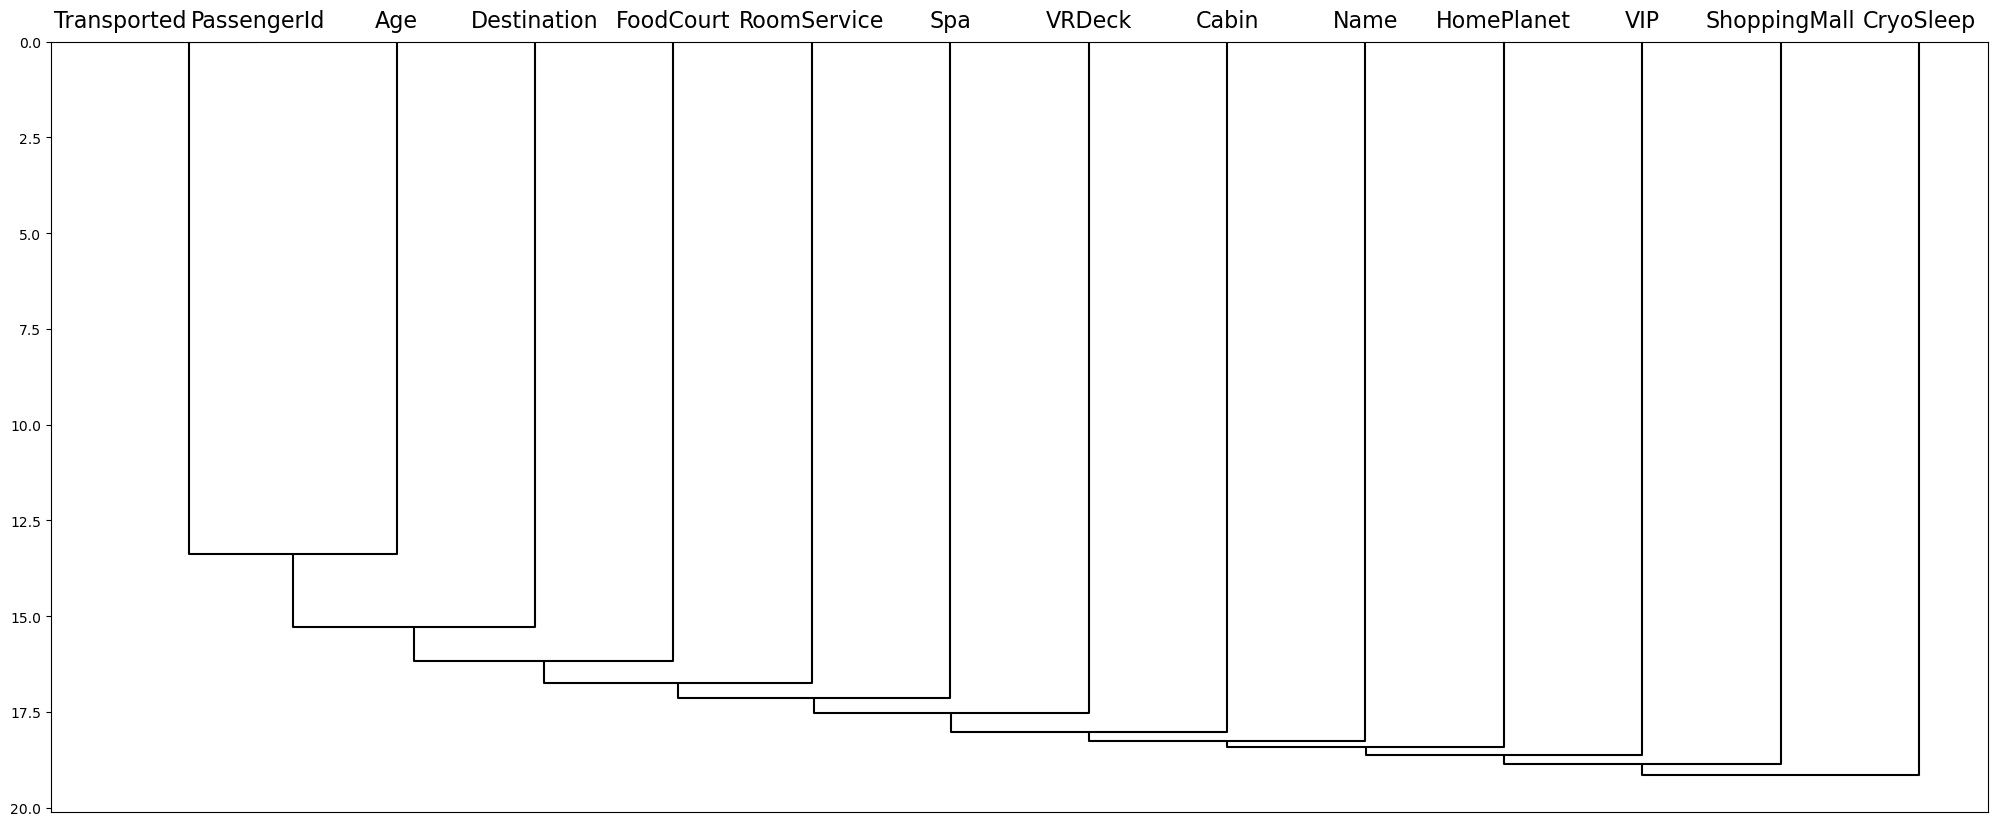

In [24]:
msno.dendrogram(data)
plt.show()

2. Handling Missing Values

Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

The Listwise deletion problem is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

In [26]:
data.Age.mean()

28.82793046746535

In [27]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [28]:
data = data.dropna(subset=['RoomService'], axis=0)

In [29]:
data.isnull().sum()

PassengerId       0
HomePlanet      195
CryoSleep       215
Cabin           195
Destination     179
Age             178
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [30]:
data = data.drop(columns='Cabin')

In [31]:
data.isnull().sum()

PassengerId       0
HomePlanet      195
CryoSleep       215
Destination     179
Age             178
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

Imputing with a constant, mean, meadian, etc.

In [32]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [33]:
const_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

In [34]:
data['FoodCourt'] = const_imputer.fit_transform([data['FoodCourt']])[0]

In [35]:
data.isnull().sum()

PassengerId       0
HomePlanet      195
CryoSleep       215
Destination     179
Age             178
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [36]:
frequent_imputer = SimpleImputer(strategy = 'most_frequent')

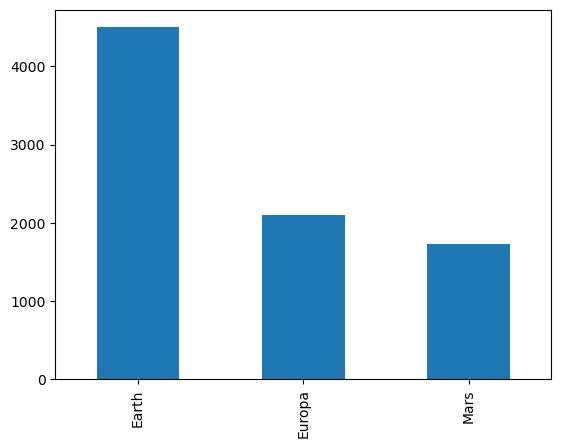

In [37]:
data['HomePlanet'].value_counts().plot.bar()
plt.show()

In [38]:
data['HomePlanet'] = data['HomePlanet'].astype(str)  # Simple imputer with most_frequent works with numbers (integers) and strings

In [39]:
data['HomePlanet'] = frequent_imputer.fit_transform(data['HomePlanet'].values.reshape(1, -1))[0]  # should fill missing values with 'Earth' since it's the most frequent

In [40]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             178
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8512 non-null   object 
 1   HomePlanet    8512 non-null   object 
 2   CryoSleep     8297 non-null   object 
 3   Destination   8333 non-null   object 
 4   Age           8334 non-null   float64
 5   VIP           8313 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8512 non-null   float64
 8   ShoppingMall  8308 non-null   float64
 9   Spa           8332 non-null   float64
 10  VRDeck        8326 non-null   float64
 11  Name          8313 non-null   object 
 12  Transported   8512 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 872.8+ KB


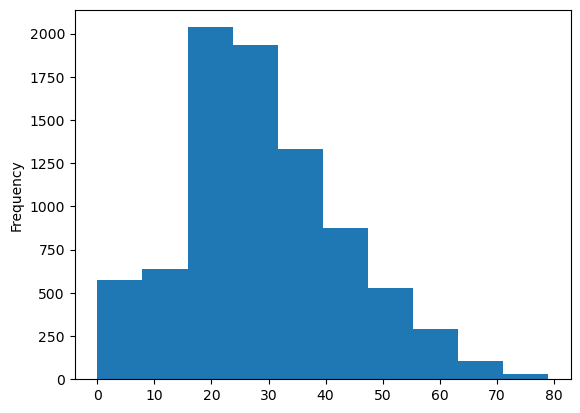

In [42]:
data.Age.plot.hist()
plt.show()

In [43]:
data.Age = data.Age.fillna(data.Age.mean())

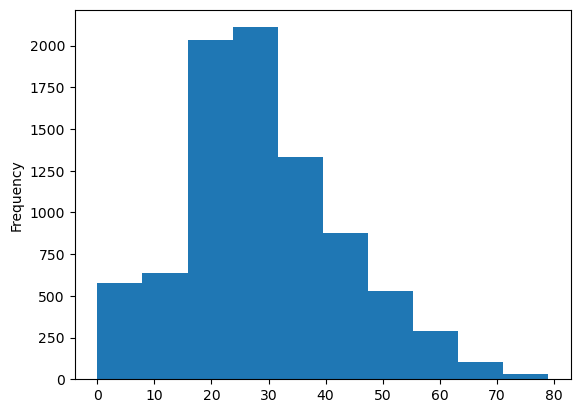

In [44]:
data.Age.plot.hist()
plt.show()

In [45]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<Axes: ylabel='Frequency'>

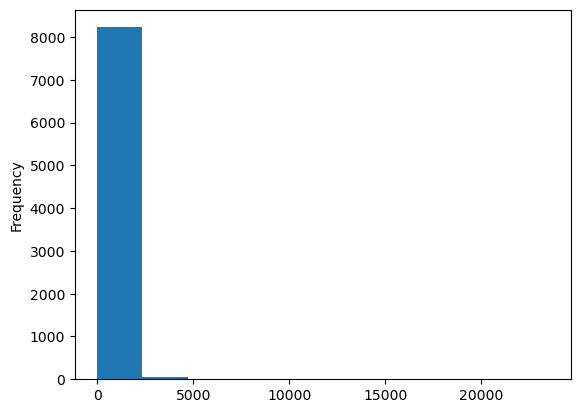

In [46]:
data.ShoppingMall.plot.hist()

In [47]:
data.ShoppingMall.mean()

173.41911410688493

In [48]:
data.ShoppingMall.median()

0.0

In [49]:
data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.median())

In [50]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

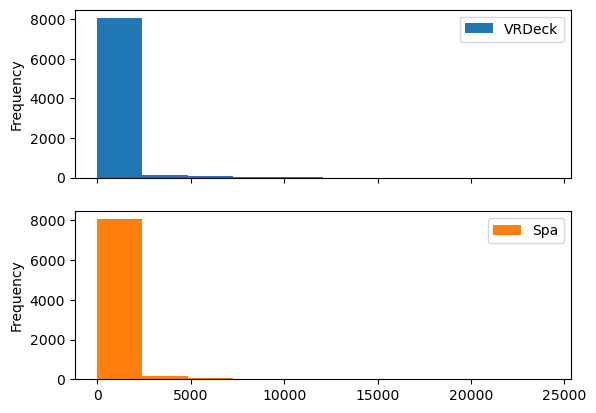

In [52]:
data[['VRDeck', 'Spa']].plot.hist(subplots=True)
plt.show()

In [53]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['VRDeck', 'Spa']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [54]:
imputed_data

array([[0.00000000e+00, 0.00000000e+00],
       [1.82322960e-03, 2.45001785e-02],
       [2.03041478e-03, 2.99669761e-01],
       ...,
       [0.00000000e+00, 4.46269190e-05],
       [1.34048813e-01, 1.57533024e-02],
       [4.97244437e-04, 0.00000000e+00]])

In [55]:
imputed_data = scaler.inverse_transform(imputed_data)

In [56]:
imputed_data

array([[0.000e+00, 0.000e+00],
       [4.400e+01, 5.490e+02],
       [4.900e+01, 6.715e+03],
       ...,
       [0.000e+00, 1.000e+00],
       [3.235e+03, 3.530e+02],
       [1.200e+01, 0.000e+00]])

In [57]:
data[['VRDeck', 'Spa']] = imputed_data

In [58]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

Multivariate feature imputation - Multivariate imputation by chained equations (MICE)
A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:
STEP ONE Impute for the single variables in the colums
THEN REMOVE the first one, Use the other ones with regresion model and then predict the removed value for the given column. Use this for every missing value. At the end caluclate the diference matrix with the new table - the old one. If the values are far away from zero do it agian but this time with the new matrix. Do this iteration untill all values in difference matrix are close to zero.

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

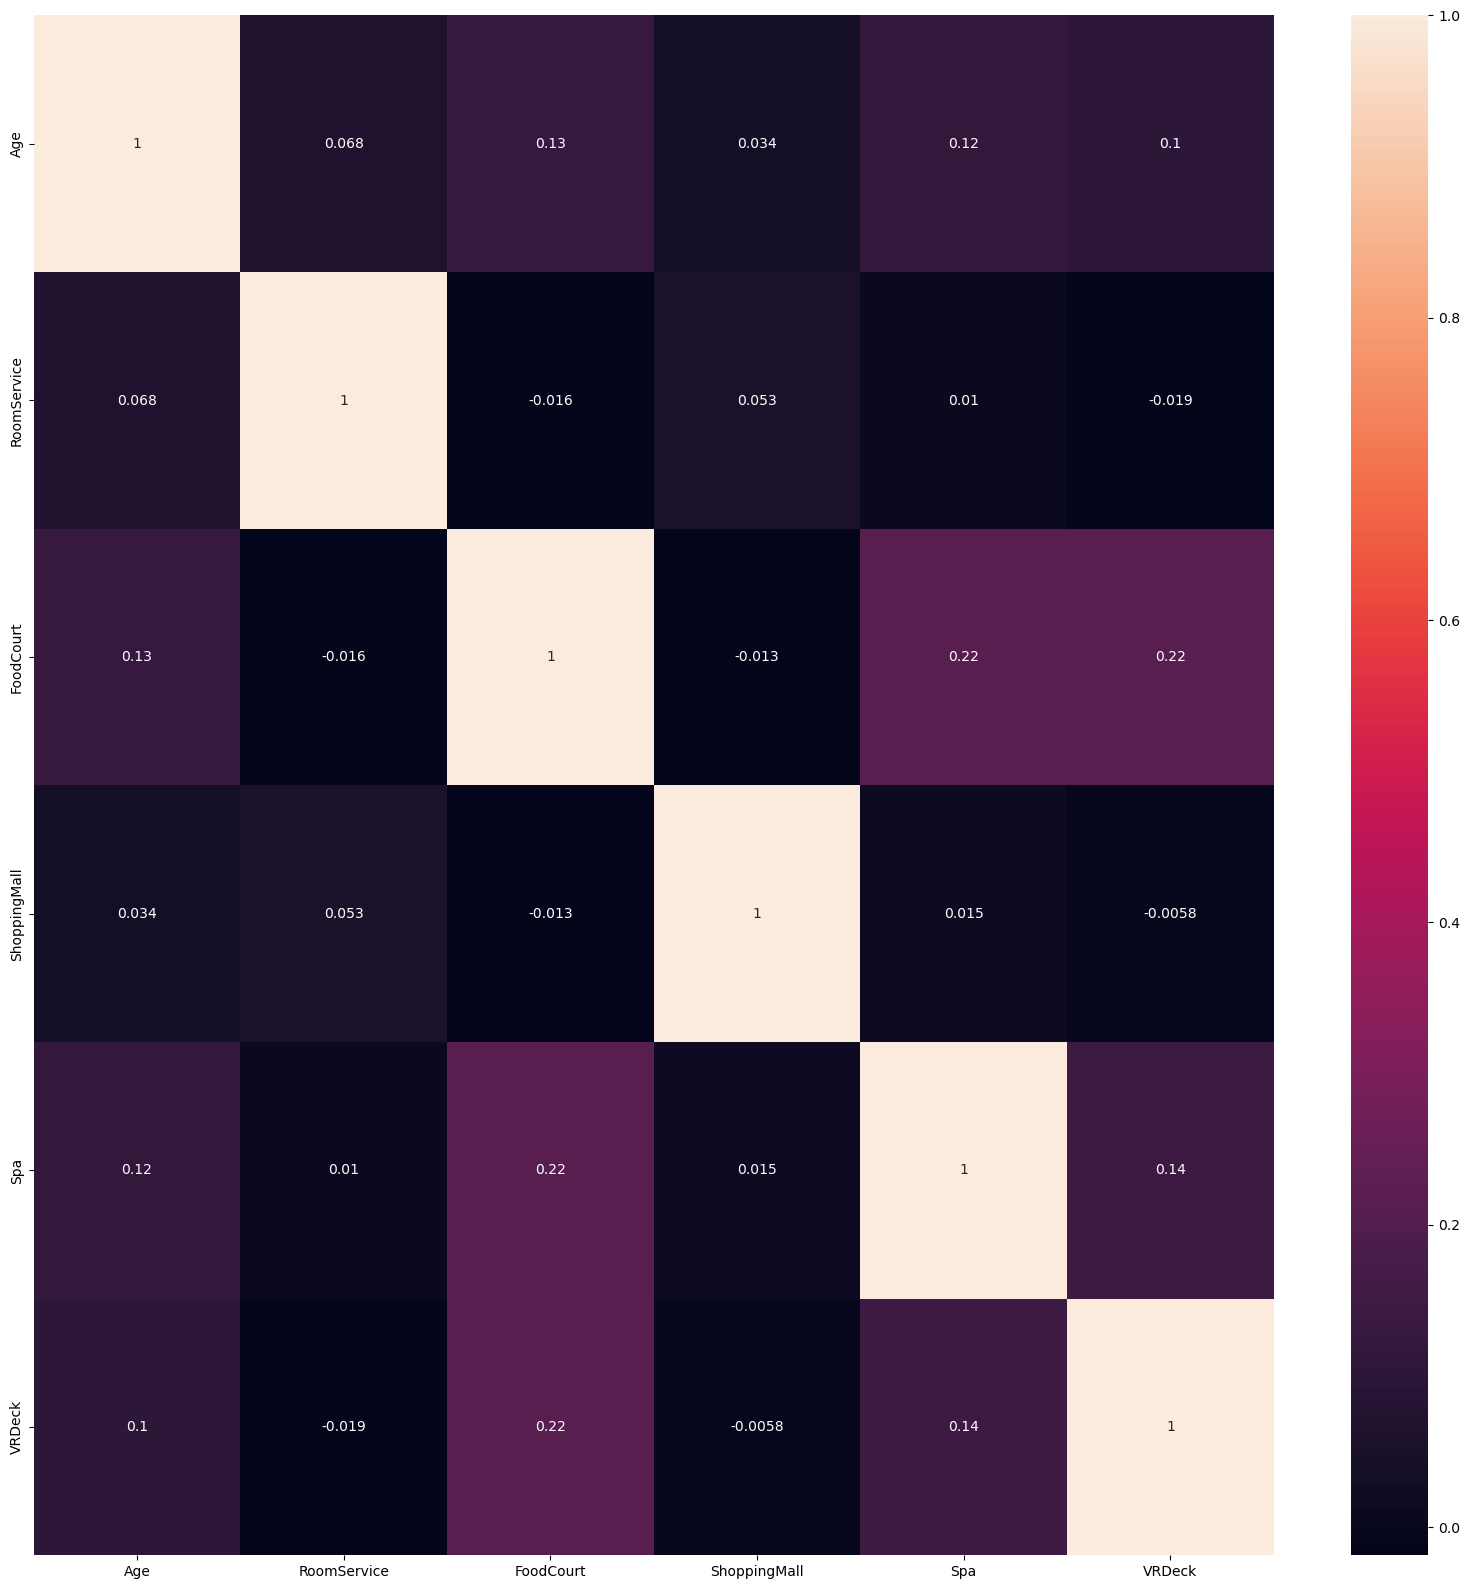

In [60]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr(), annot=True)
plt.show()

In [61]:
mice = IterativeImputer()
imputed_values = mice.fit_transform(data[['VRDeck', 'FoodCourt', 'Spa']])
data[['VRDeck', 'FoodCourt', 'Spa']] = imputed_values

In [62]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

# 3. Time - Series Missing Value Imputation


You can use MICE and KNN for time series as well since they will use the dependencies between variables.

In [63]:
aq_data = pd.read_csv('air_quality_missing.csv')

In [64]:
aq_data.head(50)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0
5,1/1/2017 5:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.1,NaN,61.0
6,1/1/2017 6:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,NaN,57.0
7,1/1/2017 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,NaN,60.0
8,1/1/2017 8:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,NaN,60.0
9,1/1/2017 9:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,NaN,63.0


In [65]:
aq_data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [66]:
aq_data.tail(20)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647491,12/31/2019 4:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.010,0.023,0.4,42.0,34.0
647492,12/31/2019 5:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.011,0.023,0.4,31.0,24.0
647493,12/31/2019 6:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.021,0.4,28.0,22.0
647494,12/31/2019 7:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.018,0.019,0.4,25.0,19.0
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0


In [67]:
aq_data['NO2'] = aq_data['NO2'].bfill()

In [68]:
aq_data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.2,NaN,61.0


In [69]:
aq_data['CO'] = aq_data['CO'].ffill()

In [70]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                95
PM2.5               78
dtype: int64

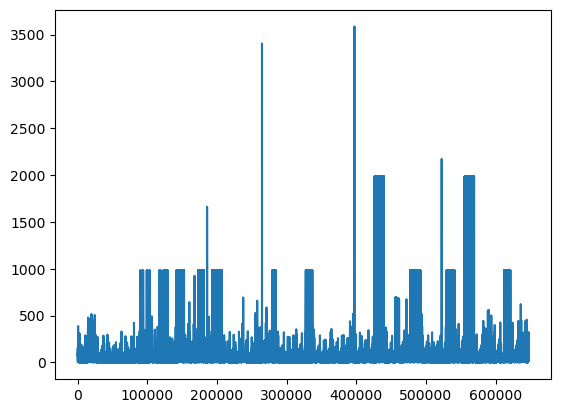

In [71]:
aq_data['PM10'].plot.line()
plt.show()

In [72]:
aq_data['PM10'] = aq_data['PM10'].interpolate(limit_direction='both')

In [73]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                 0
PM2.5               78
dtype: int64

# Label Encoding

In [74]:
data.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8512, dtype: object

In [75]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['HomePlanet'])

In [76]:
data['HomePlanet_Enc'] = encoded_values

In [77]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Enc
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


In [78]:
def encode_bool_variable(x):
  if type(x) == float:
    return x
  return 1 if x else 0

In [79]:
data['CryoSleep_Enc'] = data.CryoSleep.apply(encode_bool_variable)

In [80]:
data.Destination.value_counts()

TRAPPIST-1e      5787
55 Cancri e      1771
PSO J318.5-22     775
Name: Destination, dtype: int64

In [81]:

one_hot_destination = pd.get_dummies(data.Destination)

In [82]:
data = pd.concat([data, one_hot_destination], axis=1)